<a href="https://colab.research.google.com/github/maciekwielgosz/towards_constrained_spiking/blob/main/pomulak_ReSuMe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a naive implementation of the ReSuMe - "New Supervised Learning Method for Spiking Neural Networks" paper**

In [ ]:
# imports and constants
from math import exp
import matplotlib.pyplot as plt
TAU = 2

In [ ]:
# define basic functions
def low_pass(data, time_index):
  result = 0
  for i in range(len(data)):
    if time_index < i:
      result += exp((-1 * time_index + data[i]) / TAU )
  
  return result


In [ ]:
# get simple data for a neuron with only one input and one output
s_d = [1, 0, 0, 1, 1, 1, 1, 0] # teacher data
s_l = [1, 0, 1, 0, 1, 1, 1, 0] # output on the synapse


s_in =[1, 0, 0, 1, 1, 1, 1, 0] # input data

In [ ]:
# performance index -> L
def performance_index(s_d, s_l):
  # it is assumed that |s_d| = |s_l|
  result = 0
  for i in range(len(s_d)):
    result += abs(low_pass(s_d, i) - low_pass(s_l, i))
  
  return result


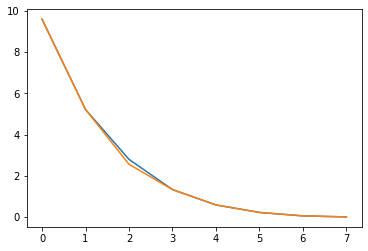

In [ ]:
# compute low_pass
result_s_d = []
result_s_l = []
for i in range(len(s_d)):
  result_s_d.append(low_pass(s_d, i))
  result_s_l.append(low_pass(s_l, i))

plt.plot(result_s_d)
plt.plot(result_s_l)


In [ ]:
# compute L
L = performance_index(s_d, s_l)
print(L)

0.2386512185411913
